In [1]:
import yaml
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [2]:
folds = 5
exp_dir = '/path/to/exp/dir'
base_config = f'{exp_dir}/base/config.yaml'

In [7]:
with open(base_config) as f:
    config = yaml.safe_load(f)
    
#phenotypes = config["phenotypes"]
phenotypes = config["training"]["phenotypes"]

cv_splits = [4]

In [8]:
kept_quant = {}
kept_perct = {}
rm_quant = {}

for split in cv_splits:
    for pheno in phenotypes:
        base_seed_gene_df = pd.read_parquet(f'{exp_dir}/base/cv_split{split}/deeprvat/{pheno}/deeprvat/seed_genes.parquet', engine="pyarrow")

        fold_vals = []
        fold_kept_perct = []
        fold_rmvd = []
        for fold in range(folds):
            fold_df = pd.read_parquet(f"{exp_dir}/sg_set_{fold}/cv_split{split}/deeprvat/{pheno}/deeprvat/seed_genes.parquet", engine="pyarrow")
            fold_vals.append(len(fold_df))
            perct = ( len(fold_df)/len(base_seed_gene_df) )
            fold_kept_perct.append(perct)
            fold_rmvd.append(len(base_seed_gene_df) - len(fold_df))

            del fold_df

        kept_quant[pheno] = fold_vals
        kept_perct[pheno] = fold_kept_perct
        rm_quant[pheno] = fold_rmvd

        del base_seed_gene_df

### Number of Seed Genes Removed
- Equal number of seed genes removed each fold
- Removed seed genes are variable across phenotypes, across folds
- Potential to not remove any seed genes from a phenotype (based on downsample and min_kept percentages specified by user)

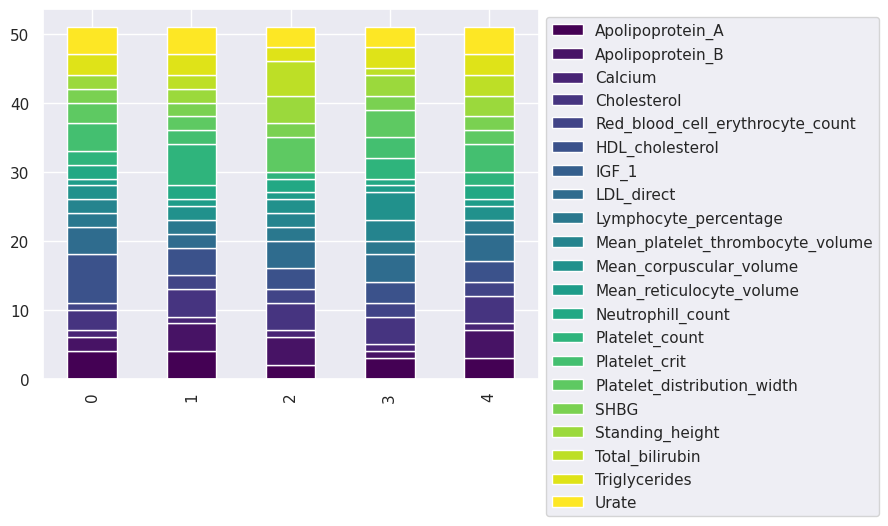

In [17]:
df_rmvd = pd.DataFrame(rm_quant)

ax1 = df_rmvd.plot(kind="bar",stacked=True, colormap='viridis')
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
ax1.set_title(f"CV Split {split} Across All Seed Gene Experiments")
plt.show()

### Number of Seed Genes Kept

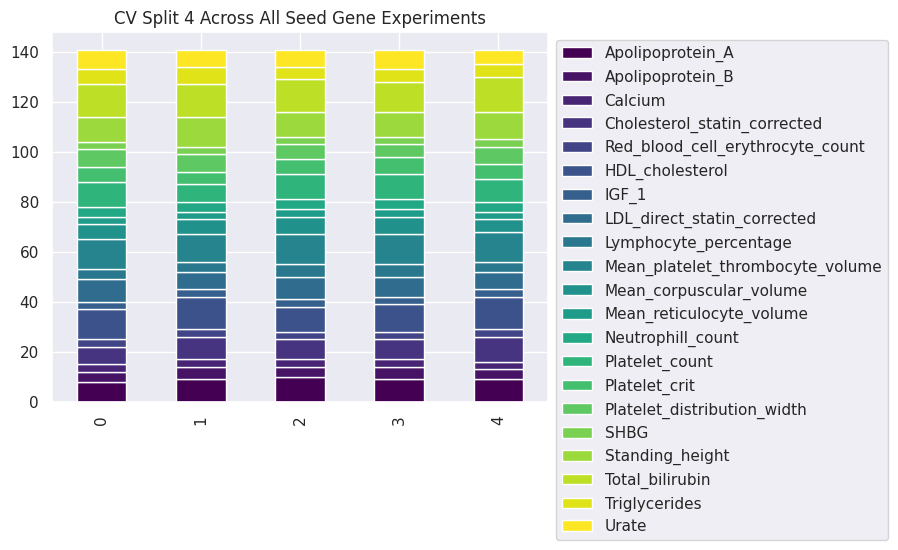

In [9]:
df_kept = pd.DataFrame(kept_quant)

ax2 = df_kept.plot(kind="bar",stacked=True, colormap='viridis')
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
ax2.set_title(f"CV Split {split} Across All Seed Gene Experiments")
plt.show()

### Percentage of Seed Genes Kept Per Phenotype Per Fold

In [ ]:
df_kp = pd.DataFrame(kept_perct)
df_kp

##### Counts of seed genes per fold per phenotype. Annotated with number seed genes kept for that phenotype.

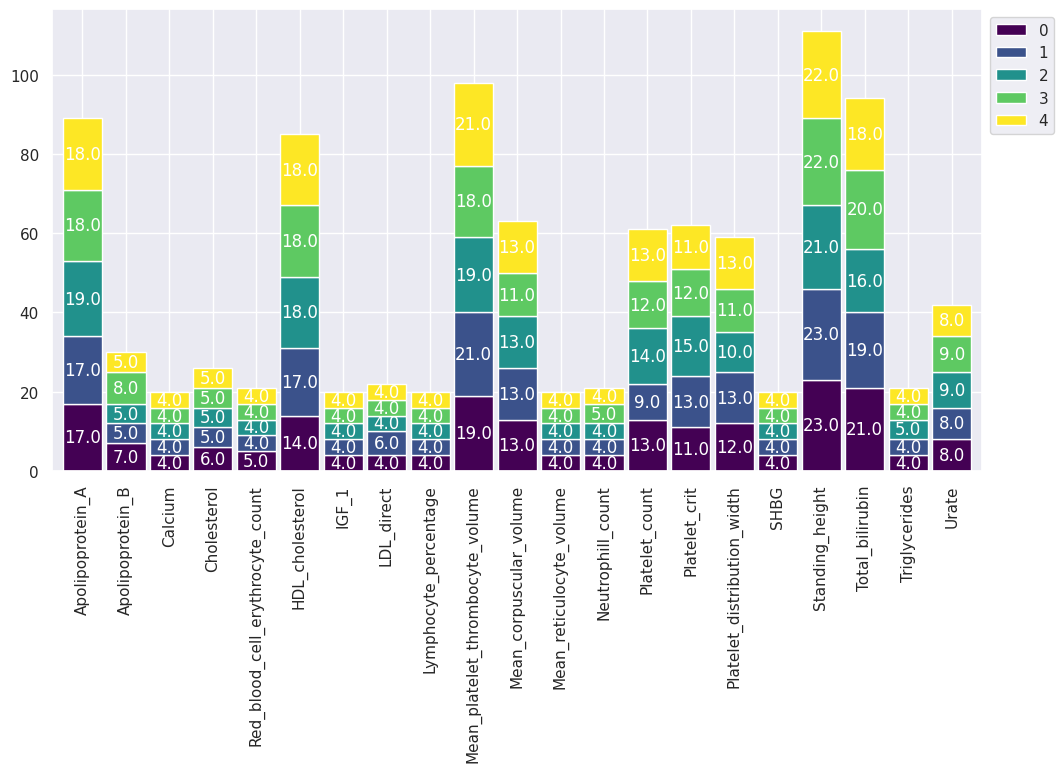

In [20]:
ax3 = df_kept.T.plot(kind="bar",stacked=True, colormap='viridis',width=0.9,figsize=(12,6))
ax3.set_title(f"CV Split {split} Across All Seed Gene Experiments")
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))

for i, c in enumerate(ax3.containers):
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    #percents = df_kp.iloc[i].round(decimals=2)
    ax3.bar_label(c, labels=labels, label_type='center', color='w')

plt.show()

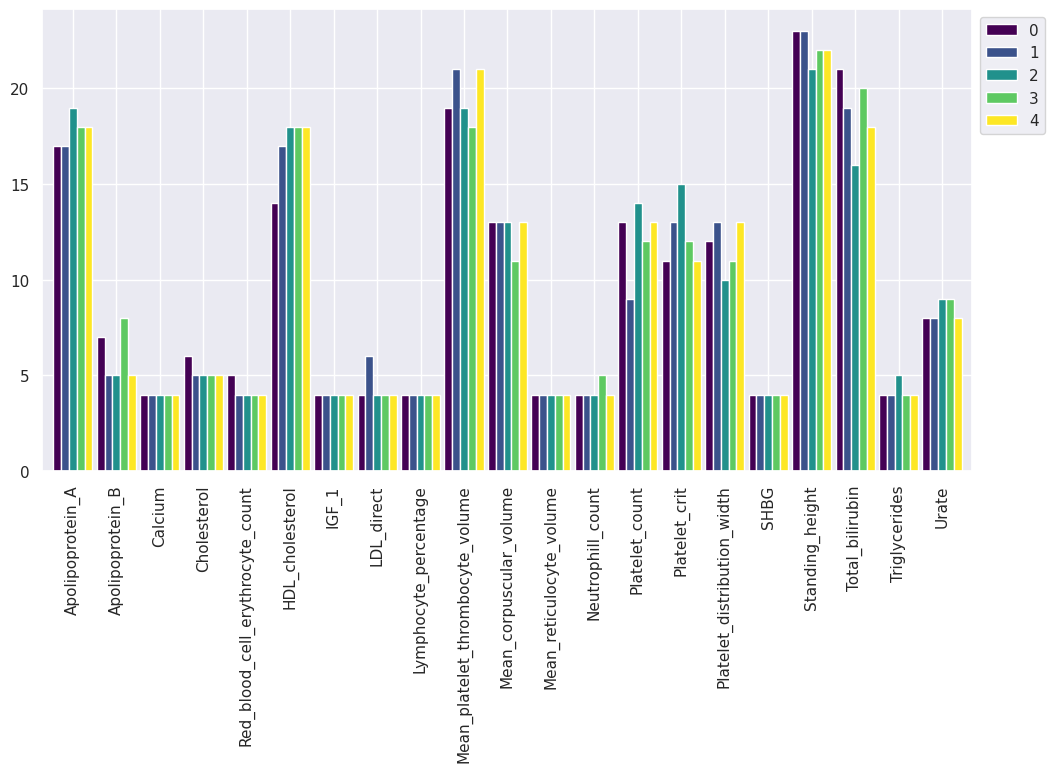

In [21]:
ax4 = df_kept.T.plot(kind="bar",stacked=False, colormap='viridis', width=0.9, figsize=(12,6))
ax4.set_title(f"CV Split {split} Across All Seed Gene Experiments")
sns.move_legend(ax4, "upper left", bbox_to_anchor=(1, 1))

plt.show()

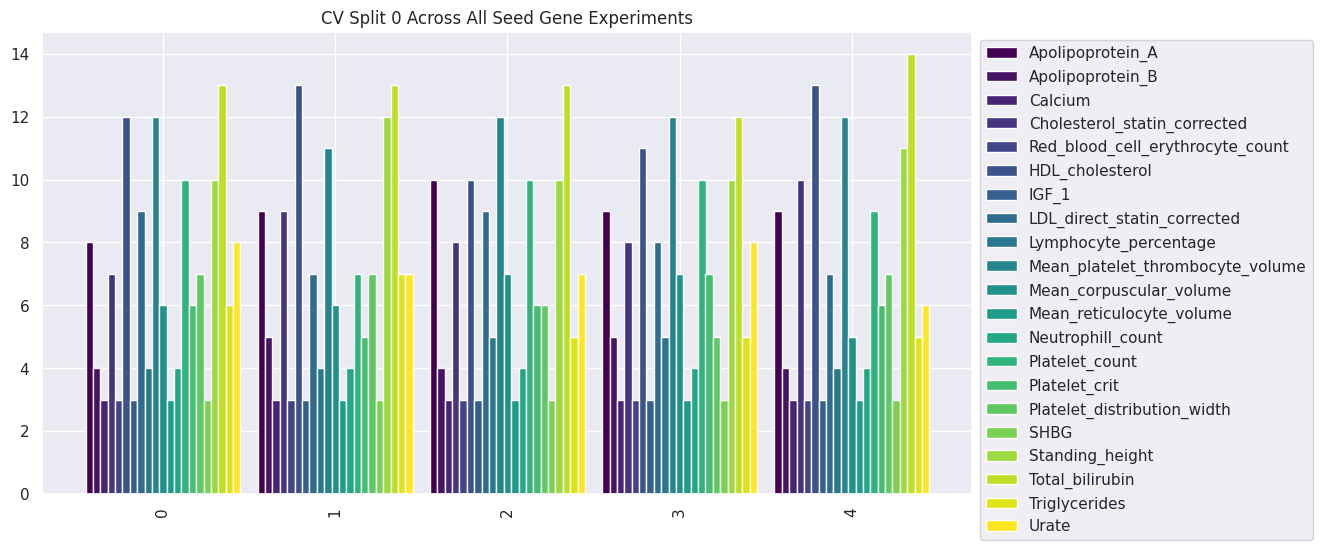

In [6]:
ax5 = df_kept.plot(kind="bar",stacked=False, colormap='viridis',width=0.9,figsize=(12,6))
ax5.set_title(f"CV Split {split} Across All Seed Gene Experiments")
sns.move_legend(ax5, "upper left", bbox_to_anchor=(1, 1))

plt.show()